### Types of analysis in Statistics:
* Descriptive Statistics
    it helps the data to describe in mathematical or graphical way
* Inferential Statistics
    splits the data into samples and applies probability to the conclusion
 
### Outlier:
* Unusual data or values within the datasets whose values are beyond the range
* basically a errors in the data

### Interquertile range IQR:
__it splits the data into 4 quartiles, Q1,Q2,Q3,Q4__

**Q1 is 25th percentiles of datasets,Q2 -->50th etc**
* Lower Limit =Q1-1.5*IQR
* Upper Limit = Q3+1.5*IQR

  

__[Dataset link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)__

### Problem Statement:
    build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [1]:
import pandas as pd
path='datasets/diabetes.csv'
df=pd.read_csv(path)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are three main types of diabetes:
1. type 1
2. type 2
3. gestational diabetes (diabetes while pregnant)


#### Data Description
**Predective Variables**
1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Outcome (1 or 2)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
df.shape

(768, 9)

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### **missing values detection and action**

In [8]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

So there is no missing values , thats awesome

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### we can see that the min values for pregnancies, Gulcose,BloodPressure, SkinThikness, insulin and BMI has o values 
#### it is possible ho have 0 pregnencies but it is not okay for other like 0 bloodpressure . they are just a missing values ####

In [10]:
df['Glucose']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [11]:
#replacing '0' with 'Nan'
def replace(columns):
    for col in columns:
        df[col]=df[col].replace(0,np.nan)

In [12]:
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
replace(cols)

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [14]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

**the missing values are in the large scale so removing the  data will loose some valuable information so we fill the missing
values with median values**

In [16]:
data=df.copy()

In [17]:
data.fillna(data.median(),inplace=True)

In [18]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Outlier Detection and removal

In [19]:
data['BloodPressure'].max()

122.0

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box(data):
    
    plt.figure(figsize=(20,15))
    variables = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction','BMI','Age']

    for i, variable in enumerate(variables):
        plt.subplot(4, 2, i+1)
        sns.boxplot(x=data[variable])
        plt.xlabel(variable)
        plt.title(f'Distribution of {variable}')

    # Display the plot
    plt.subplots_adjust(wspace=0.2, hspace=0.4)

    plt.show()


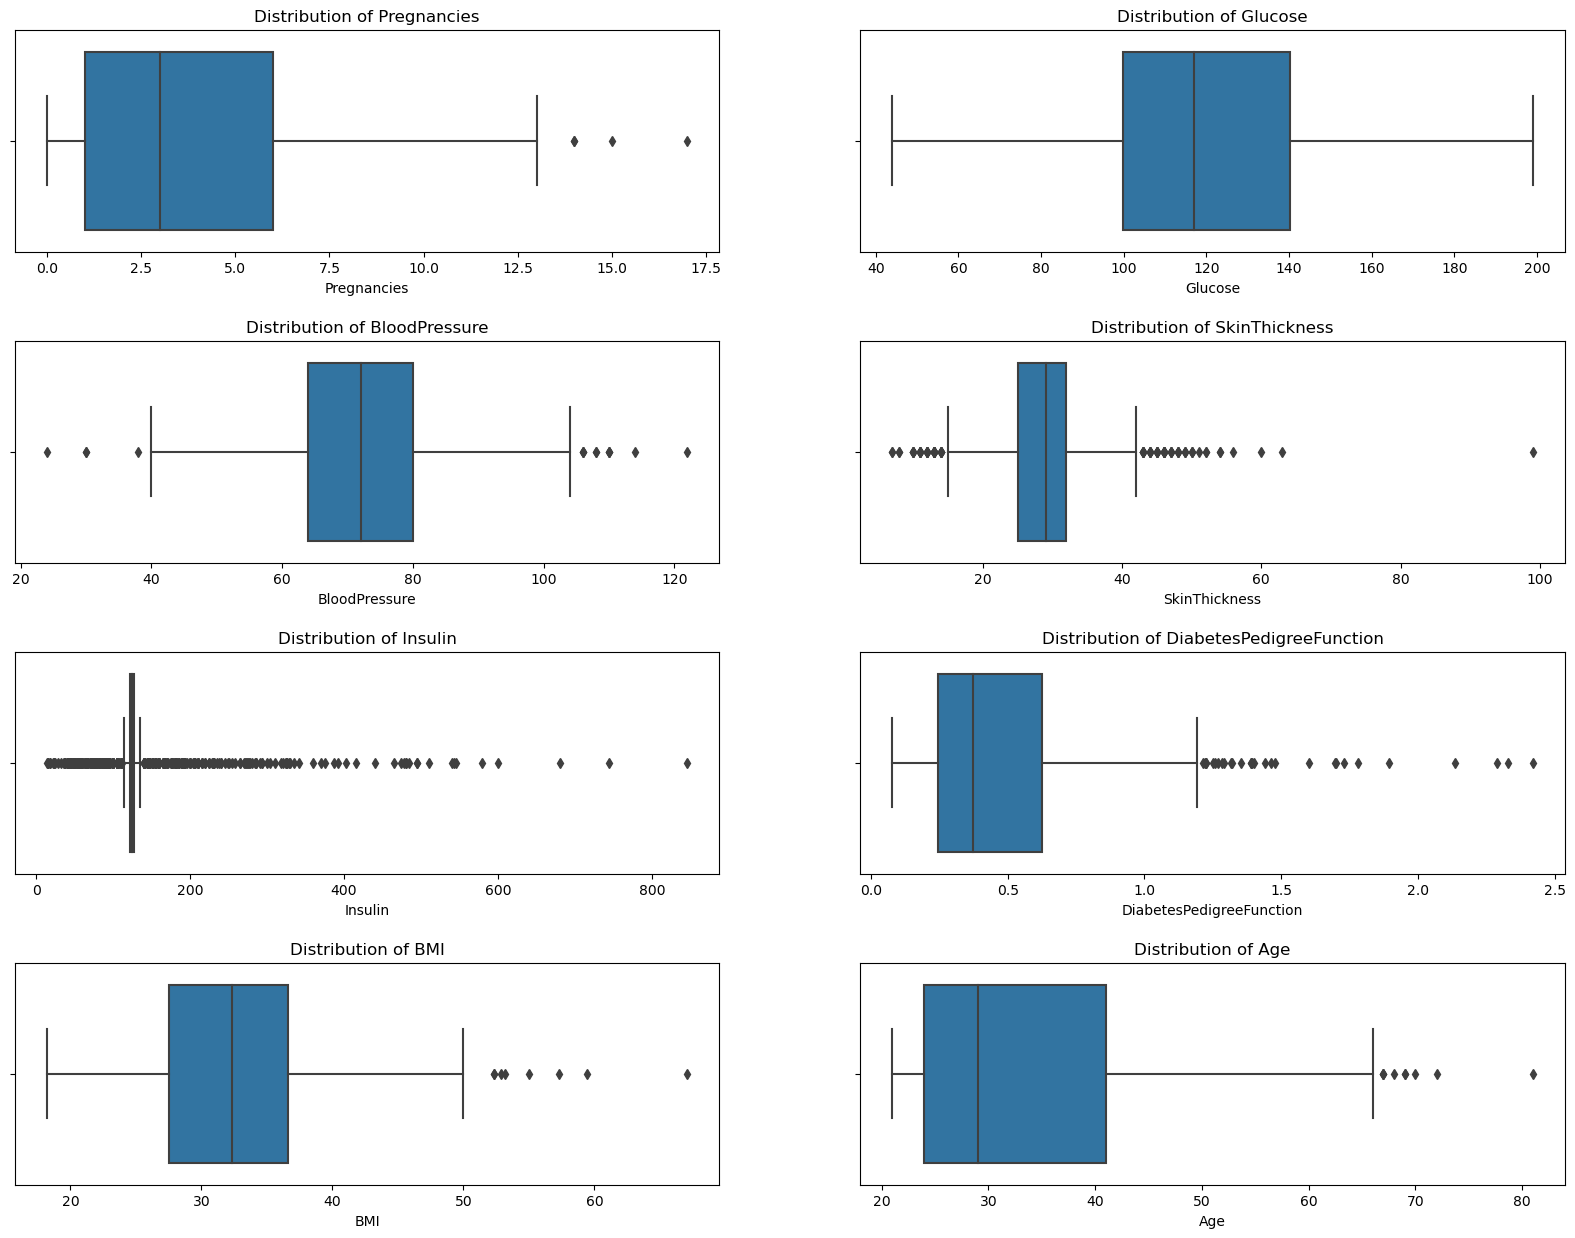

In [21]:
plot_box(data)

In [22]:
def remove_outliers(df,cols):
    data_clean=df.copy()
    for col in cols:
        Q1=data_clean[col].quantile(0.25)
        Q3=data_clean[col].quantile(0.70)
        IQR=Q3-Q1

        #calculatiog upper and lower bound
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR

        data_clean[col]=np.where(data_clean[col]>upper_bound,upper_bound,np.where (data_clean[col]<lower_bound,lower_bound,data_clean[col]))

    return data_clean

In [23]:
out_cols= ['Pregnancies','BloodPressure', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction','BMI','Age']

In [24]:
data_clean=remove_outliers(data,out_cols)

In [25]:
# cols=['BMI','BloodPressure','Age']
# out1(cols)

In [26]:
#  Q1=data_clean['SkinThickness'].quantile(0.10)
# Q3=data_clean['SkinThickness'].quantile(0.85)
# IQR=Q3-Q1

# #calculatiog upper and lower bound
# lower_bound=Q1-2*IQR
# upper_bound=Q3+2*IQR

# data_clean=data_clean[(data_clean['SkinThickness']>=lower_bound) & (data_clean['SkinThickness']<=upper_bound)]



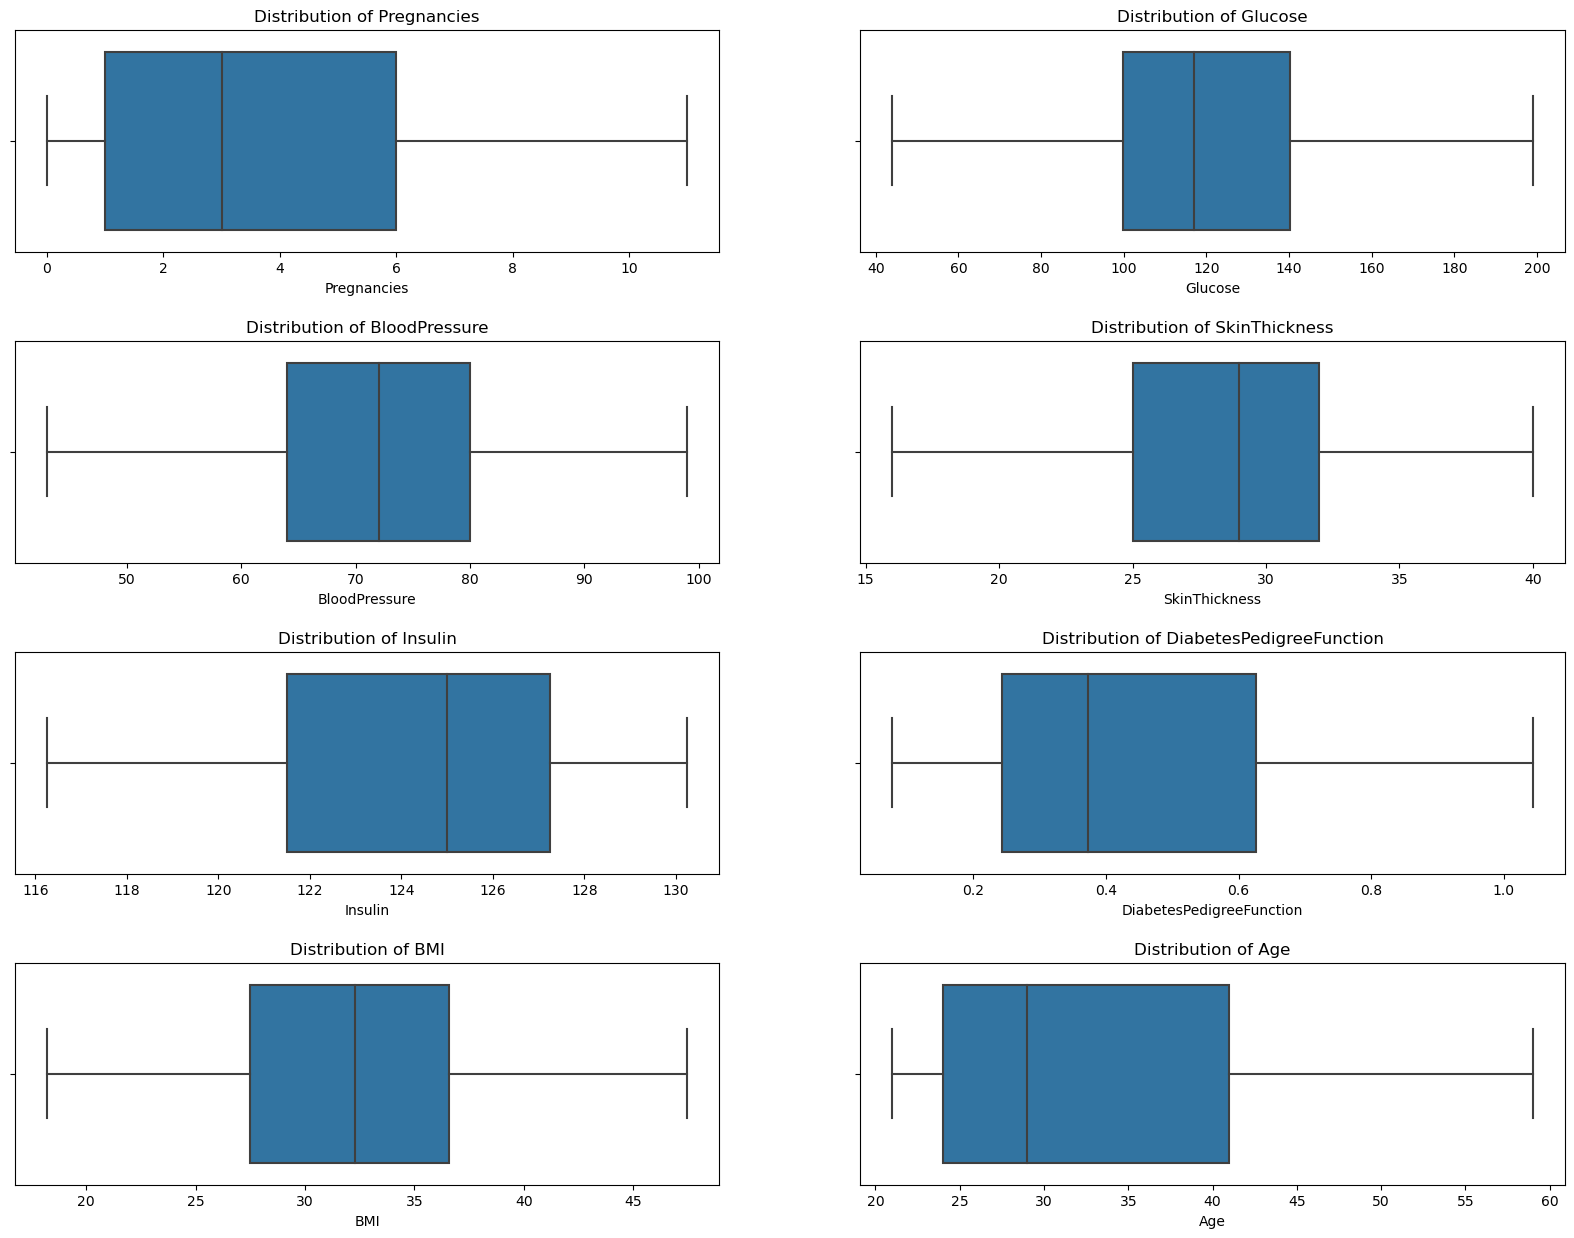

In [27]:
plot_box(data_clean)

In [28]:
data_clean.shape

(768, 9)

#### Finally we removed the outliers from the data

***

### Data Visualization 

In [29]:
data_clean['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot: xlabel='Outcome', ylabel='Count'>

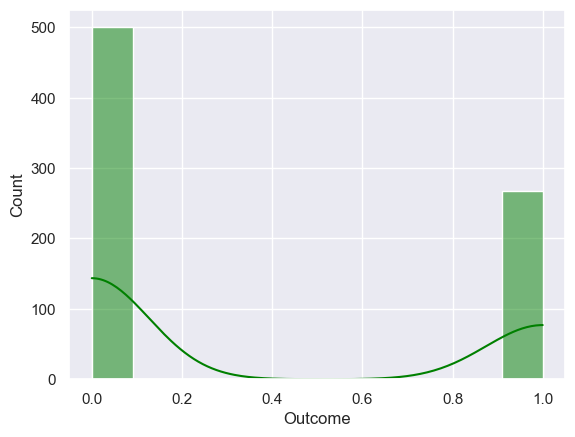

In [30]:

sns.set(style="darkgrid")
sns.histplot(df['Outcome'],color='green',kde=True)

In [31]:
data_clean.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

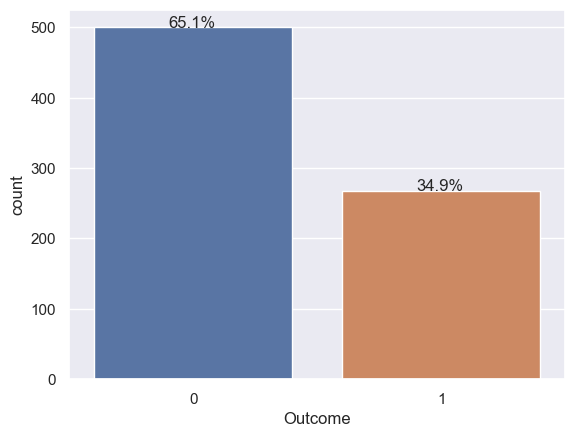

In [32]:
sns.set(style="darkgrid")
ax = sns.countplot(x=data_clean['Outcome'])
total = len(data_clean['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.1
    y = p.get_height()
    ax.annotate(percentage, (x, y), size=12)

plt.show()





<AxesSubplot: >

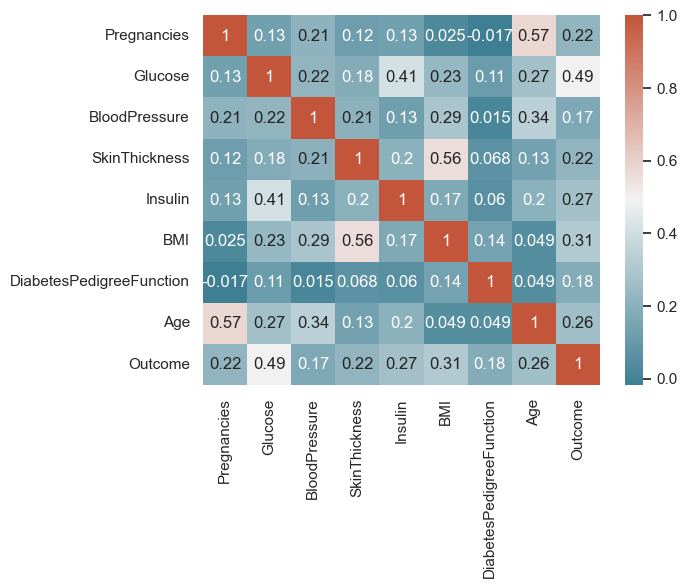

In [41]:
sns.heatmap(data_clean.corr(), annot=True,cmap=sns.diverging_palette(220,20,as_cmap=True))

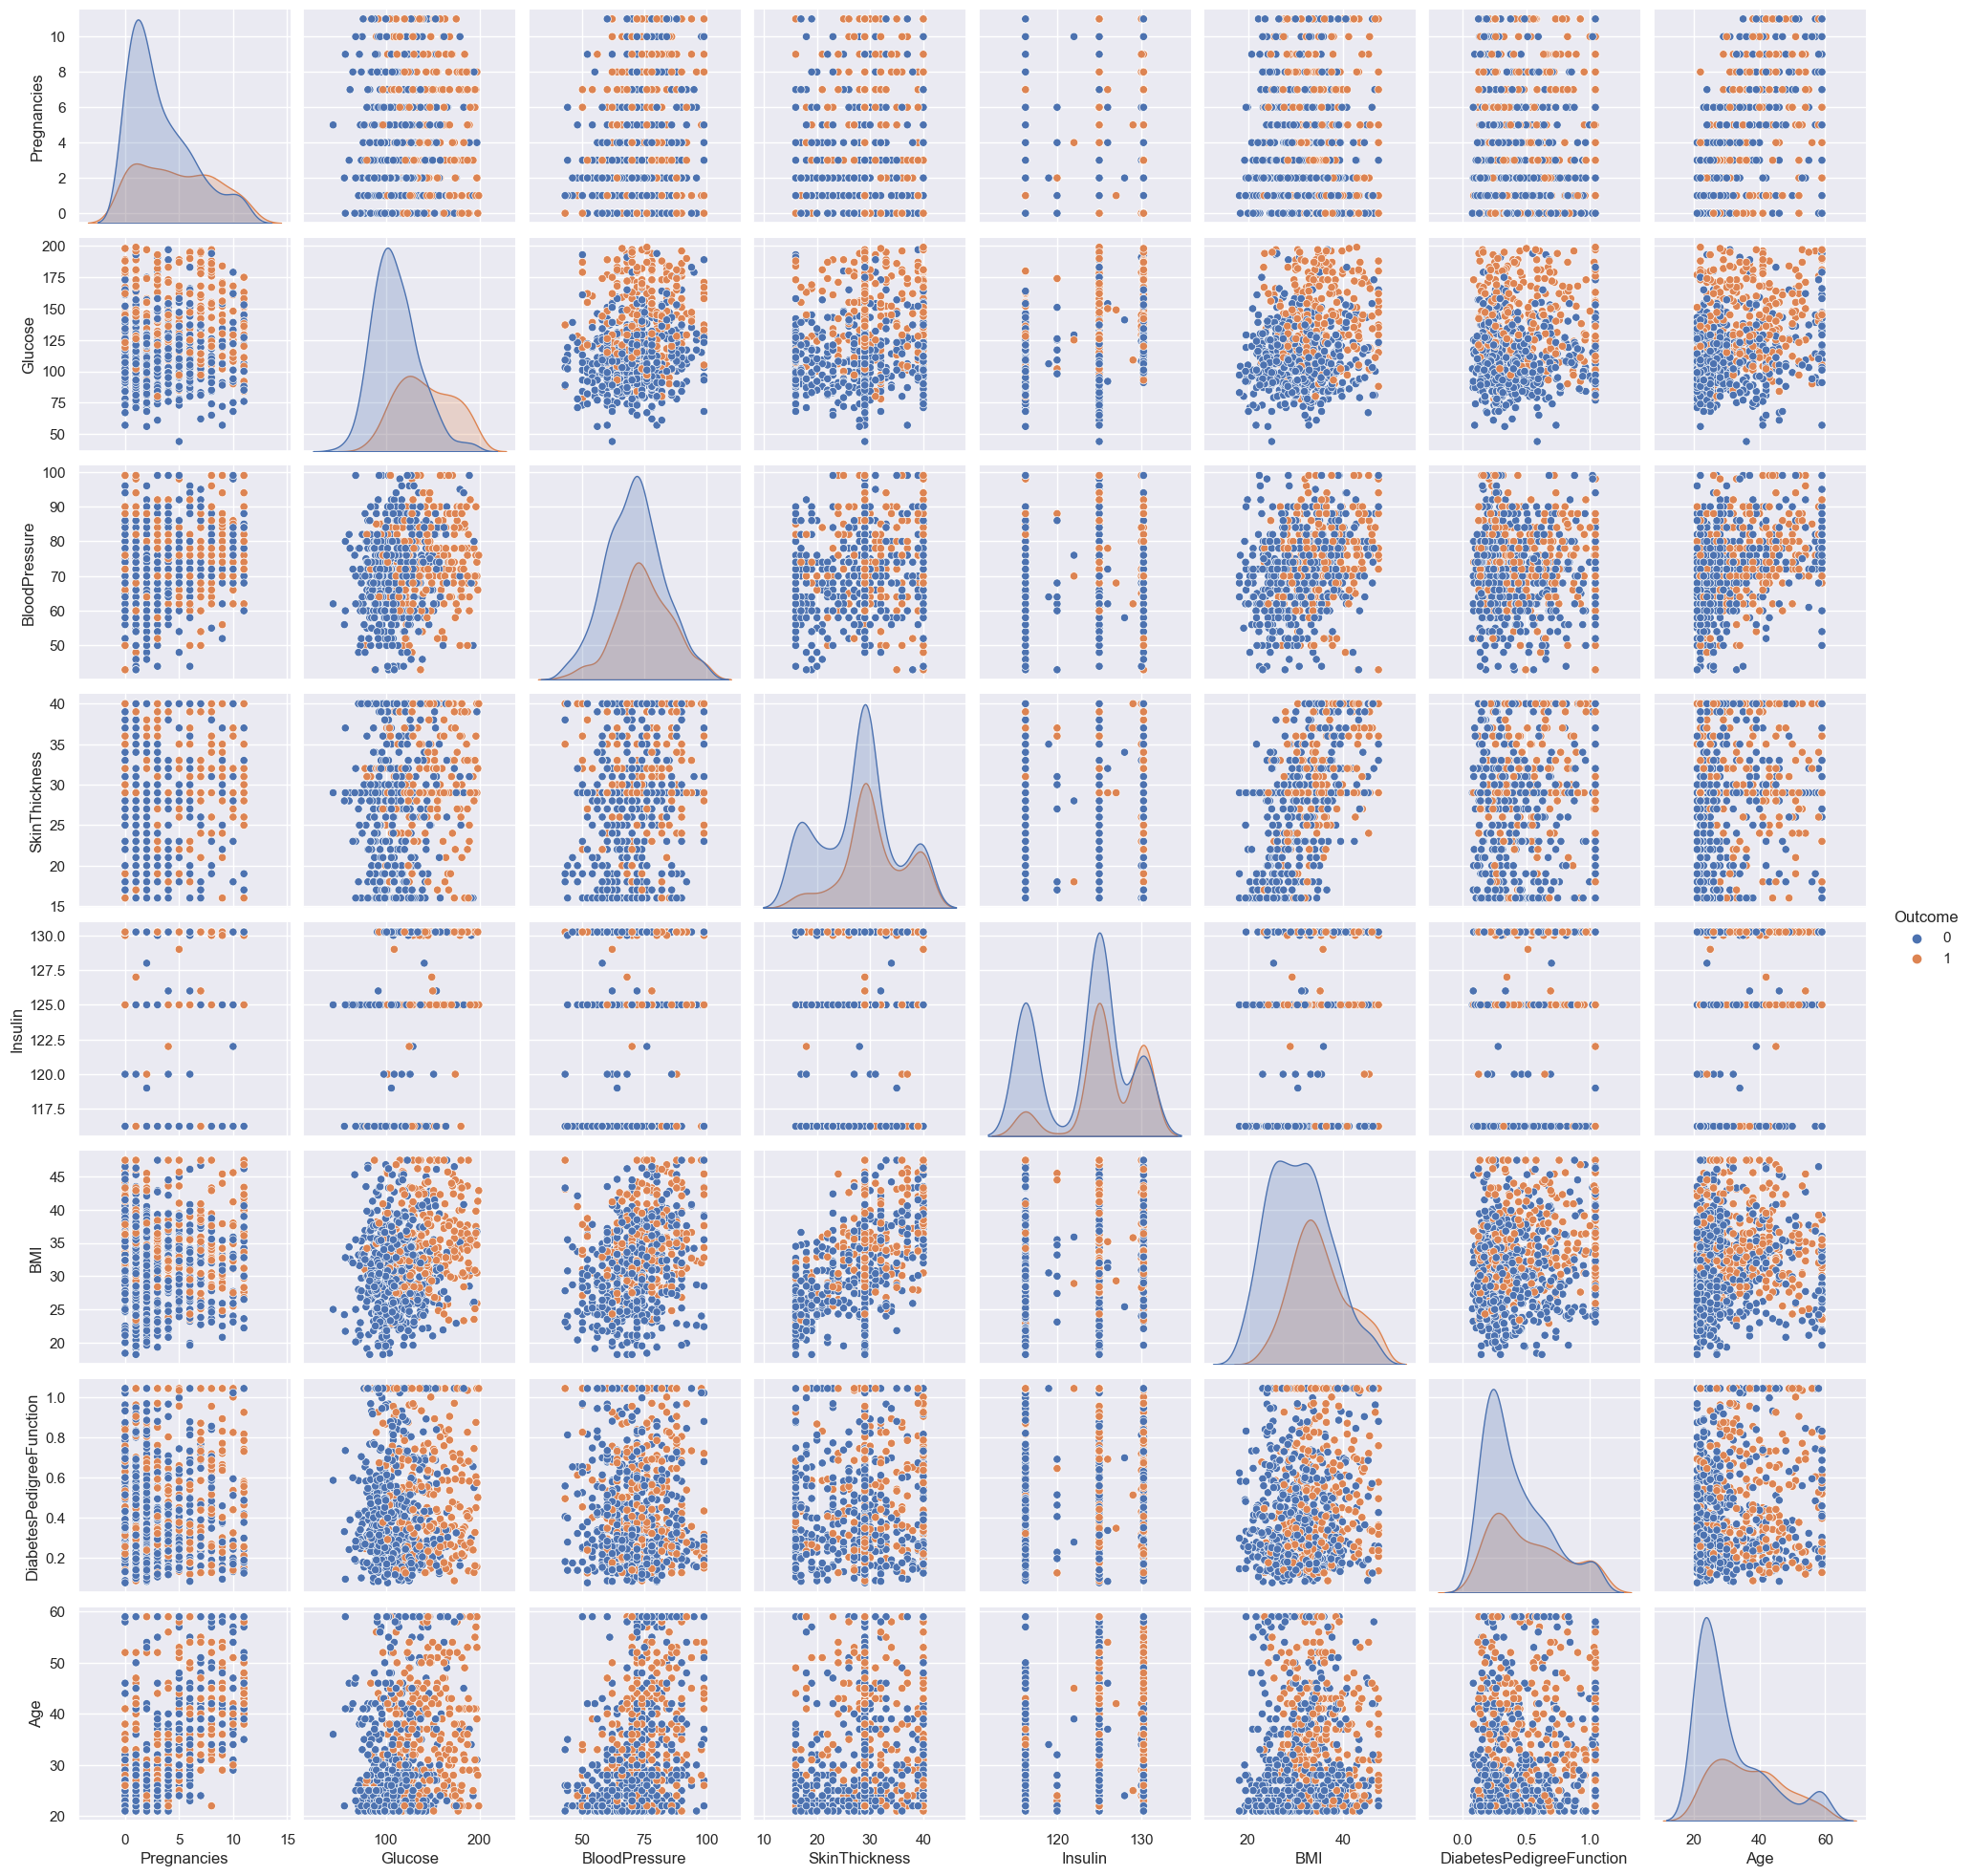

In [45]:
sns.pairplot(data_clean,hue='Outcome',diag_kind='kde')